# Homework 05

SOLVED by ANGELA CARRARO

## Exercise

Load the national COVID dataset and solve the exercise using `scikit-learn` library.
Consider first the column corresponding to the (cumulative) number of deaths. 
1. Perform a train-test split, with observations from the last week corresponding to the test set;
2. Build a suitable combination of kernels choosing from the ones shown in `notebook_05`;
3. Fit a `GaussianProcessRegressor` to predict the (cumulative) number of deaths, plot future predictions and compare them to real test data;
4. Repeat points 1-3 on the daily number of swabs, which can be computed from the cumulative number provided in the dataset.

You are welcome to try out and fit other data streams in the dataset. 


**Solution.**

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import gaussian_process
from matplotlib import pyplot as plt
import matplotlib as mt
mt.rcParams['axes.titlesize'] = 20
mt.rcParams['axes.labelsize'] = 16
mt.rcParams['xtick.labelsize'] = 12
mt.rcParams['ytick.labelsize'] = 12
mt.rcParams['legend.fontsize'] = 14

In [2]:
# Load the dataset
data_covid = pd.read_csv(os.path.join("data", "COVID_national_20200421.csv"), header=0)
data_covid

,Unnamed: 0,date,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined
0,0,2020-02-24,7,4324,26,101,221,229,1,94
1,1,2020-02-25,10,8623,35,114,93,322,1,162
2,2,2020-02-26,12,9587,36,128,78,400,3,221
3,3,2020-02-27,17,12014,56,248,250,650,45,284
4,4,2020-02-28,21,15695,64,345,238,888,46,412
5,5,2020-02-29,29,18661,105,401,240,1128,50,543
6,6,2020-03-01,34,21127,140,639,566,1694,83,798
7,7,2020-03-02,52,23345,166,742,342,2036,149,927
8,8,2020-03-03,79,25856,229,1034,466,2502,160,1000
9,9,2020-03-04,107,29837,295,1346,587,3089,276,1065


We can drop the first column since it is a repetitio of the index, later we will subsitute this index with the date.

In [3]:
data_covid = data_covid.iloc[:, 1:]
data_covid.head(10)

,date,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined
0,2020-02-24,7,4324,26,101,221,229,1,94
1,2020-02-25,10,8623,35,114,93,322,1,162
2,2020-02-26,12,9587,36,128,78,400,3,221
3,2020-02-27,17,12014,56,248,250,650,45,284
4,2020-02-28,21,15695,64,345,238,888,46,412
5,2020-02-29,29,18661,105,401,240,1128,50,543
6,2020-03-01,34,21127,140,639,566,1694,83,798
7,2020-03-02,52,23345,166,742,342,2036,149,927
8,2020-03-03,79,25856,229,1034,466,2502,160,1000
9,2020-03-04,107,29837,295,1346,587,3089,276,1065


In [4]:
# Fix time index
data_covid.index = pd.to_datetime(data_covid["date"])
l = list(data_covid.columns.values)
l.remove("date")
data_covid = data_covid.loc[:, l]
data_covid.head(10)

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined
date,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94
2020-02-25,10,8623,35,114,93,322,1,162
2020-02-26,12,9587,36,128,78,400,3,221
2020-02-27,17,12014,56,248,250,650,45,284
2020-02-28,21,15695,64,345,238,888,46,412
2020-02-29,29,18661,105,401,240,1128,50,543
2020-03-01,34,21127,140,639,566,1694,83,798
2020-03-02,52,23345,166,742,342,2036,149,927
2020-03-03,79,25856,229,1034,466,2502,160,1000


Let's create a column with the daily number of deaths and the daily number of swabs.

In [5]:
# daily_deaths = list()
# daily_deaths.append(data_covid["deaths"][0])
# for i in range(1, data_covid.shape[0]):
#     daily_deaths.append(data_covid["deaths"][i] - data_covid["deaths"][i-1])
# data_covid["daily_deaths"] = daily_deaths

daily_swabs = list()
daily_swabs.append(data_covid["swabs"][0])
for i in range(1, data_covid.shape[0]):
    daily_swabs.append(data_covid["swabs"][i] - data_covid["swabs"][i-1])
data_covid["daily_swabs"] = daily_swabs
data_covid.head()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,daily_swabs
date,,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94,4324
2020-02-25,10,8623,35,114,93,322,1,162,4299
2020-02-26,12,9587,36,128,78,400,3,221,964
2020-02-27,17,12014,56,248,250,650,45,284,2427
2020-02-28,21,15695,64,345,238,888,46,412,3681


In [6]:
# function to convert datetimes to numbers that are useful to algorithms
#   this will be useful later when doing prediction

def dates_to_idx(timelist):
    reference_time = pd.to_datetime(data_covid.index[0])
    t = (timelist - reference_time) / pd.Timedelta(1, "D")
    return np.asarray(t)

t = dates_to_idx(data_covid.index)
data_covid = data_covid.assign(t = t)

Now we split into training and test set. As test set we keep the observations from the last week.

In [7]:
sep_idx = data_covid.index.searchsorted(pd.to_datetime("2020-04-14 17:00:00"))
data_early = data_covid.iloc[:sep_idx+1, :]
data_later = data_covid.iloc[sep_idx:, :]
data_later

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,daily_swabs,t
date,,,,,,,,,,
2020-04-15,21645,1117404,3079,27643,2667,165155,38092,74696,43715,51.0
2020-04-16,22170,1178403,2936,26893,3786,168941,40164,76778,60999,52.0
2020-04-17,22745,1244108,2812,25786,3493,172434,42727,78364,65705,53.0
2020-04-18,23227,1305833,2733,25007,3491,175925,44927,80031,61725,54.0
2020-04-19,23660,1356541,2635,25033,3047,178972,47055,80589,50708,55.0
2020-04-20,24114,1398024,2573,24906,2256,181228,48877,80758,41483,56.0
2020-04-21,24648,1450150,2471,24134,2729,183957,51600,81104,52126,57.0


## Cumulative deaths

In [8]:
# normalize daily deaths data
y = data_covid["deaths"].values
first_pos = y[0]
std_pos = np.std(y)
deaths_n = (y - first_pos) / std_pos

data_covid = data_covid.assign(deaths_n = deaths_n)
data_covid.head()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,daily_swabs,t,deaths_n
date,,,,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94,4324,0.0,0.000000
2020-02-25,10,8623,35,114,93,322,1,162,4299,1.0,0.000350
2020-02-26,12,9587,36,128,78,400,3,221,964,2.0,0.000583
2020-02-27,17,12014,56,248,250,650,45,284,2427,3.0,0.001166
2020-02-28,21,15695,64,345,238,888,46,412,3681,4.0,0.001633


Text(0.5, 1.0, 'Raw cumulative deaths as a function of true time')

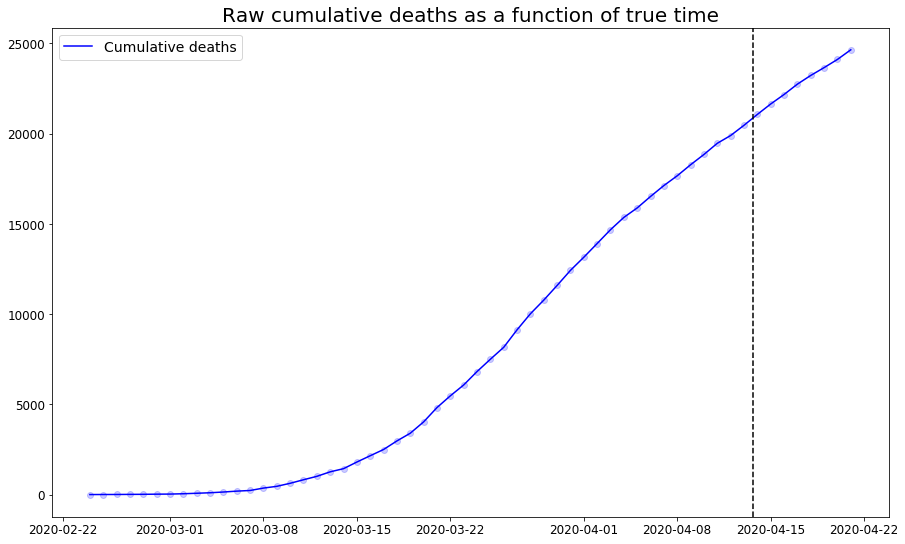

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.plot(data_covid.index, data_covid.deaths.values, color='b', label='Cumulative deaths')
ax.plot(data_covid.index, data_covid.deaths.values, color='b', marker='o', linestyle='', alpha=0.2)
ax.axvline(pd.to_datetime("2020-04-13 17:00:00"), linestyle='--', color='k') # vertical line
ax.legend()
ax.set_title('Raw cumulative deaths as a function of true time')

Text(0.5, 1.0, 'Rescaled cumulative deaths as a function of time index')

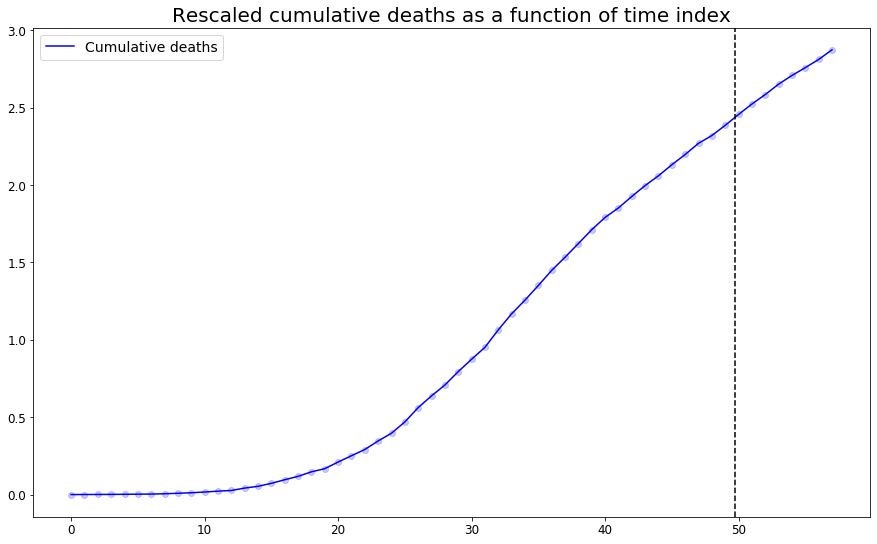

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.plot(data_covid.t.values, data_covid.deaths_n.values, color='b', label='Cumulative deaths')
ax.plot(data_covid.t.values, data_covid.deaths_n.values, color='b', marker='o', linestyle='', alpha=0.2)
ax.axvline(dates_to_idx(pd.to_datetime("2020-04-13 17:00:00")), linestyle='--', color='k')
ax.legend()
ax.set_title('Rescaled cumulative deaths as a function of time index')

### Fitting Gaussian Processes for forecasting

In [25]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [12]:
X = data_covid.t.values[:, None]
train_X = X[:len(data_early)]
test_X = X[len(data_early):]

# To use the raw data you shold use
# y = data_covid.daily_deaths.values
# To use the normalized data you shold use
y = data_covid.deaths_n.values

train_y = y[:len(data_early)]
test_y = y[len(data_early):]

In [13]:
def plot_predictions(gp, include_observed=True):
    pred_y, pred_std = gp.predict(X, return_std=True)
    plt.figure(figsize=(10, 7))
    x = X[:, 0]
    if include_observed:
        plt.plot(x, y, 'ok', alpha=0.1)
    l, = plt.plot(x, pred_y)
    plt.fill_between(x, pred_y + pred_std, pred_y - pred_std,
                     color=l.get_color(), alpha=0.3)
    if np.allclose(X[:, 0], data_covid.t.values):
        plt.axvline(dates_to_idx(pd.to_datetime("2020-04-13 17:00:00")), linestyle='--', color='k')
    else:
        plt.axvline(pd.to_datetime("2020-04-13 17:00:00"), linestyle='--', color='k')

Since in the cumulative number of deaths, as we can see in the previous graphs, there isn't a periodic trend, I choose not to use the `ExpSineSquared` kernel.

In [14]:
k1 = 50.0**2 * RBF(length_scale=50.0)
k2 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k3 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-3, 1e9))
kernel = k1 + k2 + k3

# Create the regressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True, n_restarts_optimizer=3)
gp

GaussianProcessRegressor(alpha=0, copy_X_train=True,
             kernel=50**2 * RBF(length_scale=50) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01),
             n_restarts_optimizer=3, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [15]:
# Train the regressor
gp.fit(train_X, train_y)

GaussianProcessRegressor(alpha=0, copy_X_train=True,
             kernel=50**2 * RBF(length_scale=50) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01),
             n_restarts_optimizer=3, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [16]:
# The log marginal likelihood of the MAP can be found after training
gp.log_marginal_likelihood_value_

105.66286547955902

In [17]:
# The fitted kernel's parameters are packed into an array
gp.kernel_.theta

array([-11.51292546,  -4.60175797,   0.83746583,  -0.23081007,
         3.48533655, -11.51292546,   4.70404171,  -6.90775528])

In [ ]:
# The GP also exposes the log marginal likelihood function callable
#kk1 = np.linspace(1e-3, 25, 50)
#kk2 = np.linspace(1e-3, 20, 50)
#lml = np.empty((len(kk1), len(kk2)))
#for i, kk1_ in enumerate(kk1):
#    for j, kk2_ in enumerate(kk2):
#        try:
#            lml[i, j] = gp.log_marginal_likelihood([kk1_, kk2_])
#        except ValueError:
            # Numerical instabilities can cause overflows or underflows
            # we replace these errored values with NaN
#            lml[i, j] = np.nan

In [ ]:
#plt.figure(figsize=(9, 7))
#plt.pcolor(kk2, kk1, lml, vmin=-100)
#plt.colorbar()
#plt.plot([gp.kernel_.theta[1]], [gp.kernel_.theta[0]], 'or')
#plt.xlabel('k2', fontsize=14)
#plt.ylabel('k1', fontsize=14)
#plt.title('Log marginal likelihood', fontsize=18)

0.00316**2 * RBF(length_scale=0.01) + 1.52**2 * RationalQuadratic(alpha=0.794, length_scale=32.6) + 0.00316**2 * RBF(length_scale=110) + WhiteKernel(noise_level=0.001)

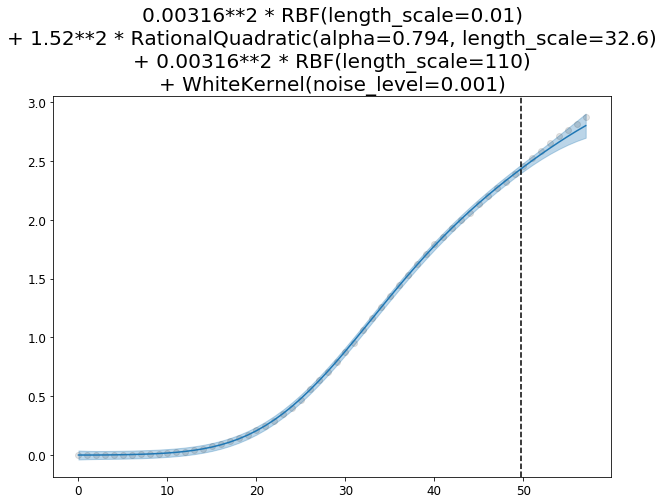

In [18]:
plot_predictions(gp)
plt.title(str(gp.kernel_).replace(' +', '\n+'))
gp.kernel_

---

## Daily swabs

In [19]:
# normalize daily swabs data
y = data_covid["daily_swabs"].values
first_pos = y[0]
std_pos = np.std(y)
swabs_n = (y - first_pos) / std_pos

data_covid = data_covid.assign(swabs_n = swabs_n)
data_covid.head()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,daily_swabs,t,deaths_n,swabs_n
date,,,,,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94,4324,0.0,0.000000,0.000000
2020-02-25,10,8623,35,114,93,322,1,162,4299,1.0,0.000350,-0.001359
2020-02-26,12,9587,36,128,78,400,3,221,964,2.0,0.000583,-0.182653
2020-02-27,17,12014,56,248,250,650,45,284,2427,3.0,0.001166,-0.103123
2020-02-28,21,15695,64,345,238,888,46,412,3681,4.0,0.001633,-0.034954


Text(0.5, 1.0, 'Daily swabs as a function of true time')

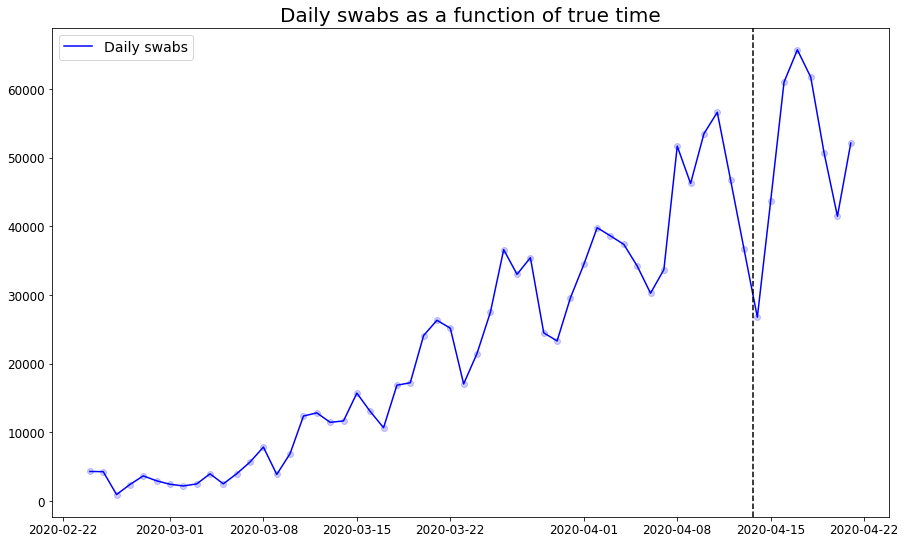

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.plot(data_covid.index, data_covid.daily_swabs.values, color='b', label='Daily swabs')
ax.plot(data_covid.index, data_covid.daily_swabs.values, color='b', marker='o', linestyle='', alpha=0.2)
ax.axvline(pd.to_datetime("2020-04-13 17:00:00"), linestyle='--', color='k') # vertical line
ax.legend()
ax.set_title('Daily swabs as a function of true time')

### Fitting Gaussian Processes for forecasting

In [21]:
# To use the raw data you shold use
# y = data_covid.daily_swabs.values
# To use the normalized data you shold use
y = data_covid.swabs_n.values

train_y = y[:len(data_early)]
test_y = y[len(data_early):]

Here, since the daily number of swabs fluctuates a lot, the `ExpSineSquared` kernel might help, though here the periodicity is not constant and doesn't follow a pattern. For this reason the prediction is very difficult, and my kernel in fact makes a not so good prediction.

1.12**2 * RBF(length_scale=30.3) * ExpSineSquared(length_scale=3.49, periodicity=7.11) + 0.138**2 * RationalQuadratic(alpha=1e+05, length_scale=1.09) + 0.00316**2 * RBF(length_scale=0.000289) + WhiteKernel(noise_level=0.0196)

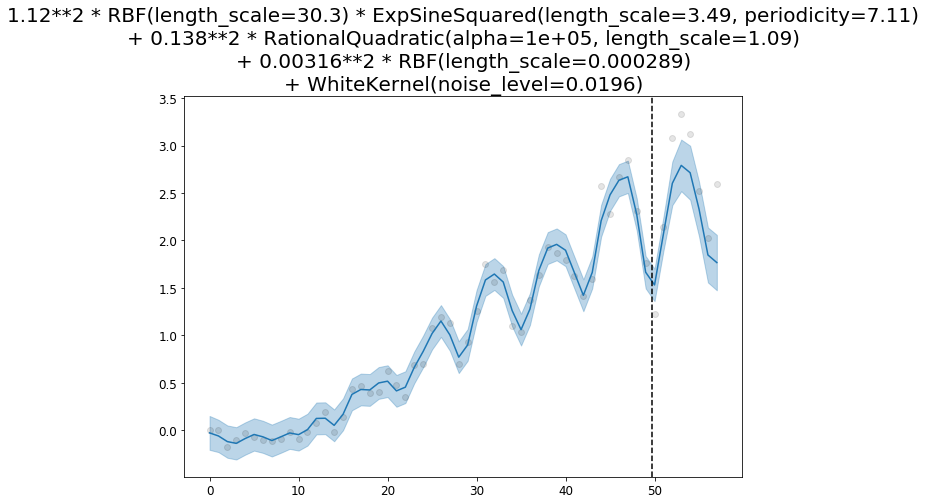

In [34]:
k1 = 2.0**2 * RBF(length_scale=50.0) \
    * ExpSineSquared(length_scale=10.0, periodicity=100.0,
                     periodicity_bounds=(1e-5, 1e5))
k2 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k3 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-3, 1e9))
kernel2 = k1 + k2 + k3

# Create the regressor
gp2 = GaussianProcessRegressor(kernel=kernel2, alpha=0, normalize_y=True, n_restarts_optimizer=3)
# Train the regressor
gp2.fit(train_X, train_y)
plot_predictions(gp2)
plt.title(str(gp2.kernel_).replace(' +', '\n+'))
gp2.kernel_

---

## Up-to-date dataset

We can instead use the dataset provided by the Italian government (on GitHub at this [link](https://github.com/pcm-dpc/COVID-19)), which is more up-to-date.

The structure of the dataset is the following:


| Nome campo                  | Descrizione                       | Description                            | Formato                       | Esempio             |
|-----------------------------|-----------------------------------|----------------------------------------|-------------------------------|---------------------|
| **data**                        | Data dell'informazione            | Date of notification                   | YYYY-MM-DD HH:MM:SS (ISO 8601) Ora italiana | 2020-03-05 12:15:45 |
| **stato**                       | Stato di riferimento              | Country of reference                   | XYZ (ISO 3166-1 alpha-3)      | ITA                 |
| **ricoverati_con_sintomi**      | Ricoverati con sintomi            | Hospitalised patients with symptoms    | Numero                        | 3                   |
| **terapia_intensiva**           | Ricoverati in terapia intensiva   | Intensive Care                         | Numero                        | 3                   |
| **totale_ospedalizzati**        | Totale ospedalizzati              | Total hospitalised patients            | Numero                        | 3                   |
| **isolamento_domiciliare**      | Persone in isolamento domiciliare | Home confinement                       | Numero                        | 3                   |
| **totale_positivi** | Totale attualmente positivi (ospedalizzati + isolamento domiciliare)      | Total amount of current positive cases (Hospitalised patients + Home confinement)  | Numero                        | 3                   |
| **variazione_totale_positivi**  | Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente)       | News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  | Numero                        | 3                   |
| **nuovi_positivi**  | Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente)       | News amount of current positive cases (totale_casi current day - totale_casi previous day)  | Numero                        | 3                   |
| **dimessi_guariti**             | Persone dimesse guarite           | Recovered                              | Numero                        | 3                   |
| **deceduti**                    | Persone decedute                  | Death                                  | Numero                        | 3                   |
| **totale_casi**                 | Totale casi positivi              | Total amount of positive cases         | Numero                        | 3                   |
| **tamponi**                     | Totale tamponi                    | Tests performed                        | Numero                        | 3                   |
| **casi_testati**                     | Totale dei soggetti sottoposti al test                    | Total number of people tested                        | Numero                        | 3                   |
| **note_it**                     | Note in lingua italiana (separate da ;)                   | Notes in italian language (separated by ;)                       | Testo                        | pd-IT-000                   |
| **note_en**                     | Note in lingua inglese (separate da ;)                    | Notes in english language (separated by ;)                       | Testo                        | pd-EN-000                   |

In [3]:
# Load the dataset
data_covid2 = pd.read_csv(os.path.join("data", "dpc-covid19-ita-andamento-nazionale.csv"), header=0)
data_covid2

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN
5,2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,NaN,NaN,NaN
6,2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,NaN,NaN,NaN
7,2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,NaN,NaN,NaN
8,2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN,NaN,NaN
9,2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,107,3089,29837,NaN,NaN,NaN


We can drop the first column since the State is always Italy (it's the national dataset), and the last two columns since they contain only some notes, not relevant for our analysis.

In [4]:
# data_covid = data_covid.iloc[:, :14]
cols = data_covid2.columns.drop("stato")
cols = cols.drop("note_it")
cols = cols.drop("note_en")
data_covid2 = data_covid2.loc[:, list(cols.values)]
data_covid2.head(10)

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
0,2020-02-24T18:00:00,101,26,127,94,221,0,221,1,7,229,4324,NaN
1,2020-02-25T18:00:00,114,35,150,162,311,90,93,1,10,322,8623,NaN
2,2020-02-26T18:00:00,128,36,164,221,385,74,78,3,12,400,9587,NaN
3,2020-02-27T18:00:00,248,56,304,284,588,203,250,45,17,650,12014,NaN
4,2020-02-28T18:00:00,345,64,409,412,821,233,238,46,21,888,15695,NaN
5,2020-02-29T18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,NaN
6,2020-03-01T18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,NaN
7,2020-03-02T18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,NaN
8,2020-03-03T18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN
9,2020-03-04T18:00:00,1346,295,1641,1065,2706,443,587,276,107,3089,29837,NaN


In [6]:
# Replace NaN with 0
data_covid2.replace(to_replace=np.nan, value=0, inplace=True)
data_covid2

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
0,2020-02-24T18:00:00,101,26,127,94,221,0,221,1,7,229,4324,0.0
1,2020-02-25T18:00:00,114,35,150,162,311,90,93,1,10,322,8623,0.0
2,2020-02-26T18:00:00,128,36,164,221,385,74,78,3,12,400,9587,0.0
3,2020-02-27T18:00:00,248,56,304,284,588,203,250,45,17,650,12014,0.0
4,2020-02-28T18:00:00,345,64,409,412,821,233,238,46,21,888,15695,0.0
5,2020-02-29T18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,0.0
6,2020-03-01T18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,0.0
7,2020-03-02T18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,0.0
8,2020-03-03T18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,0.0
9,2020-03-04T18:00:00,1346,295,1641,1065,2706,443,587,276,107,3089,29837,0.0


In [7]:
# Fix time index
data_covid2.index = pd.to_datetime(data_covid2["data"])
l = list(data_covid2.columns.values)
l.remove("data")
data_covid2 = data_covid2.loc[:, l]
data_covid2.head(10)

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
data,,,,,,,,,,,,
2020-02-24 18:00:00,101,26,127,94,221,0,221,1,7,229,4324,0.0
2020-02-25 18:00:00,114,35,150,162,311,90,93,1,10,322,8623,0.0
2020-02-26 18:00:00,128,36,164,221,385,74,78,3,12,400,9587,0.0
2020-02-27 18:00:00,248,56,304,284,588,203,250,45,17,650,12014,0.0
2020-02-28 18:00:00,345,64,409,412,821,233,238,46,21,888,15695,0.0
2020-02-29 18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,0.0
2020-03-01 18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,0.0
2020-03-02 18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,0.0
2020-03-03 18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,0.0


In [17]:
# function to convert datetimes to numbers that are useful to algorithms
#   this will be useful later when doing prediction

def dates_to_idx2(timelist):
    reference_time = pd.to_datetime(data_covid2.index[0])
    t = (timelist - reference_time) / pd.Timedelta(1, "D")
    return np.asarray(t)

t = dates_to_idx2(data_covid2.index)

# normalize total positive data
y = data_covid2["totale_positivi"].values
first_pos = y[0]
std_pos = np.std(y)
y_n = (y - first_pos) / std_pos

data_covid2 = data_covid2.assign(t = t)
data_covid2 = data_covid2.assign(y_n = y_n)
data_covid2

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,t,y_n
data,,,,,,,,,,,,,,
2020-02-24 18:00:00,101,26,127,94,221,0,221,1,7,229,4324,0.0,0.000000,0.000000
2020-02-25 18:00:00,114,35,150,162,311,90,93,1,10,322,8623,0.0,1.000000,0.002132
2020-02-26 18:00:00,128,36,164,221,385,74,78,3,12,400,9587,0.0,2.000000,0.003886
2020-02-27 18:00:00,248,56,304,284,588,203,250,45,17,650,12014,0.0,3.000000,0.008695
2020-02-28 18:00:00,345,64,409,412,821,233,238,46,21,888,15695,0.0,4.000000,0.014216
2020-02-29 18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,0.0,5.000000,0.019618
2020-03-01 18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,0.0,6.000000,0.032128
2020-03-02 18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,0.0,7.000000,0.038241
2020-03-03 18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,0.0,8.000000,0.048382


Now we split into training and test set. As test set we choose to keep the last week of the data.

In [18]:
sep_idx = data_covid2.index.searchsorted(pd.to_datetime("2020-04-27 17:00:00"))
data_early2 = data_covid2.iloc[:sep_idx+1, :]
data_later2 = data_covid2.iloc[sep_idx:, :]
data_later2

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,t,y_n
data,,,,,,,,,,,,,,
2020-04-27 17:00:00,20353,1956,22309,83504,105813,-290,1739,66624,26977,199414,1789662,1237317.0,62.958333,2.501838
2020-04-28 17:00:00,19723,1863,21586,83619,105205,-608,2091,68941,27359,201505,1846934,1274871.0,63.958333,2.487433
2020-04-29 17:00:00,19210,1795,21005,83652,104657,-548,2086,71252,27682,203591,1910761,1313460.0,64.958333,2.474449
2020-04-30 17:00:00,18149,1694,19843,81708,101551,-3106,1872,75945,27967,205463,1979217,1354901.0,65.958333,2.400857
2020-05-01 17:00:00,17569,1578,19147,81796,100943,-608,1965,78249,28236,207428,2053425,1398633.0,66.958333,2.386451
2020-05-02 17:00:00,17357,1539,18896,81808,100704,-239,1900,79914,28710,209328,2108837,1429864.0,67.958333,2.380788
2020-05-03 17:00:00,17242,1501,18743,81436,100179,-525,1389,81654,28884,210717,2153772,1456911.0,68.958333,2.368349


Text(0.5, 1.0, 'Total positive persons as a function of true time')

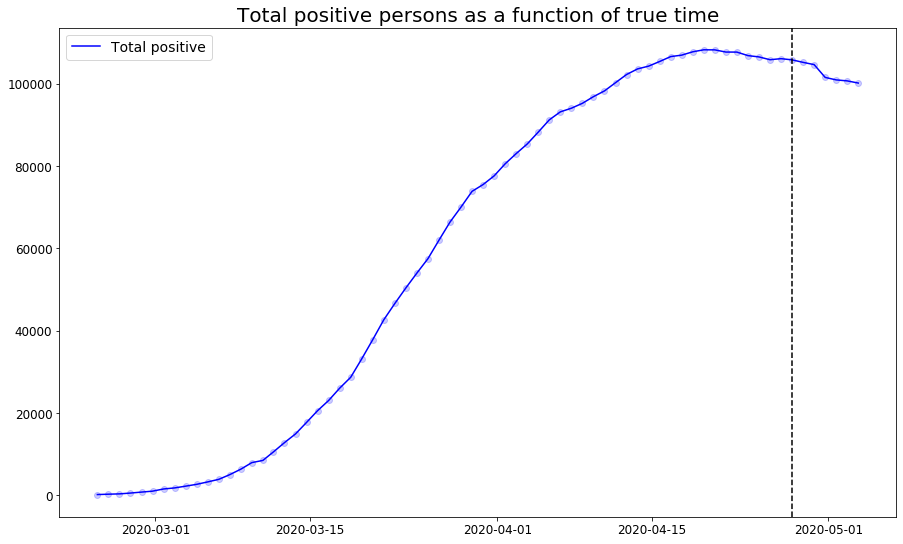

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.plot(data_covid2.index, data_covid2.totale_positivi.values, color='b', label='Total positive')
ax.plot(data_covid2.index, data_covid2.totale_positivi.values, color='b', marker='o', linestyle='', alpha=0.2)
ax.axvline(pd.to_datetime("2020-04-27 17:00:00"), linestyle='--', color='k') # vertical line
ax.legend()
ax.set_title('Total positive persons as a function of true time')

## Fitting Gaussian Processes for forecasting

We focus on the `totale_positivi` column. We will use different kernels to try to explain the training data and view how the predictions work for the test set.

In [19]:
X = data_covid2.t.values[:, None]
train_X = X[:len(data_early)]
test_X = X[len(data_early):]
# To use the raw data you shold use
#y = data_covid2.totale_positivi.values
#train_y = y[:len(data_early)]
#test_y = y[len(data_early):]

In [21]:
# To use the normalized data you shold use
y = data_covid2.y_n.values
train_y = y[:len(data_early)]
test_y = y[len(data_early):]

In [27]:
def plot_predictions2(gp, include_observed=True):
    pred_y, pred_std = gp.predict(X, return_std=True)
    plt.figure(figsize=(10, 7))
    x = X[:, 0]
    if include_observed:
        plt.plot(x, y, 'ok', alpha=0.1)
    l, = plt.plot(x, pred_y)
    plt.fill_between(x, pred_y + pred_std, pred_y - pred_std,
                     color=l.get_color(), alpha=0.3)
    if np.allclose(X[:, 0], data_covid2.t.values):
        plt.axvline(dates_to_idx2(pd.to_datetime("2020-04-27 17:00:00")), linestyle='--', color='k')
    else:
        plt.axvline(pd.to_datetime("2020-04-27 17:00:00"), linestyle='--', color='k')

Since in the column `totale_positivi`, as we can see in the previous graph, there isn't a periodic trend, I choose not to use the `ExpSineSquared` kernel.

1.03**2 * RBF(length_scale=27.5) + 0.136**2 * RationalQuadratic(alpha=1e+05, length_scale=10.3) + 0.00316**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.001)

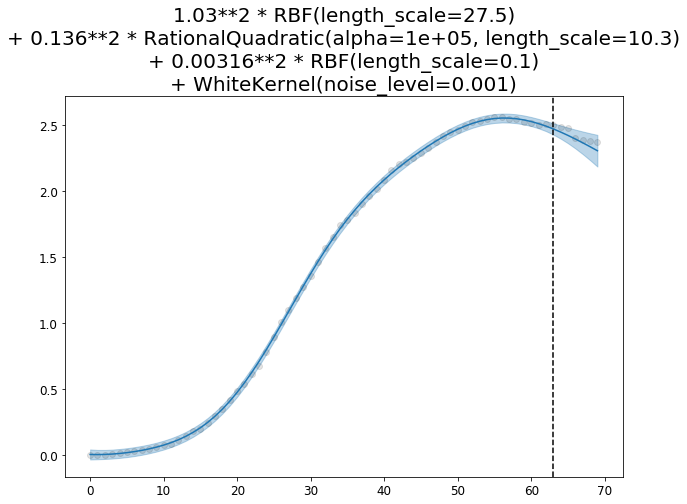

In [28]:
k1 = 50.0**2 * RBF(length_scale=50.0)
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,noise_level_bounds=(1e-3, 1e9))  # noise terms
kernel = k1 + k3 + k4

gp2 = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True, n_restarts_optimizer=3)
gp2.fit(train_X, train_y)
plot_predictions2(gp2)
plt.title(str(gp2.kernel_).replace(' +', '\n+'))
gp2.kernel_